#  Dataset preprocessing in Python for Machine Learning models

This program is a simple exemple to domonstre how to take care about dataset with missing data, non numerical variables and different scale. For this example, we consider a dataset composed by 4 columns and 10 lines. The colums are in order: Country, Age, Salary and Purchased.
Library for Machine Learn: SciKitLearn.

**Dataset Description**

For this example, we consider a simple dataset composed by four columns and ten rows. The dataset contains information about ten car purchase for a given car store. The columns are: Country, Age, Salary and Purchased. The three first columns are our features and the last is the response (dependent variable) yes or not. Each row represents a custumer.

## Importing Libraries 


In [1]:
import numpy as np
import matplotlib.pyplot as pĺt
import pandas as pd # One of the most library to read and treat a dataset

## Importing the Dataset

In [2]:
dataset = pd.read_csv('Data.csv') # reading and creating a dataset
X = dataset.iloc[:,:-1].values # Creating the independent variables (three first columns)
y = dataset.iloc[:,-1].values # Creating the dependent variable (response last column)

## Some dataset information

In [3]:
dataset.shape # To show the dataset format

(10, 4)

In [4]:
dataset.head() # To read the first rows of dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [5]:
dataset.describe() # To describe some statistical informations about numerical variables

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


<AxesSubplot:>

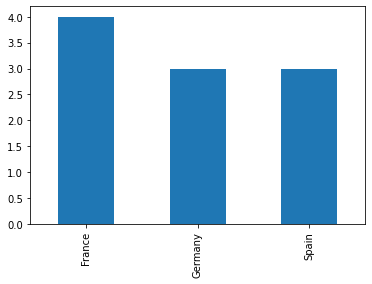

In [6]:
dataset['Country'].value_counts().plot.bar() # To count and visualize the categorical variables

<AxesSubplot:>

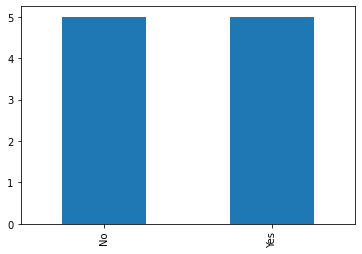

In [7]:
dataset['Purchased'].value_counts().plot.bar() # To count and visualize the categorical variables

In [8]:
dataset.isna().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [9]:
dataset.dtypes

Country       object
Age          float64
Salary       float64
Purchased     object
dtype: object

**Note about the dataset**

We visualized preliminary information about the dataset as some statistical for the numerical variables and the plot bar to visualize the numerical variables. There are two important remarks here, first we have missing data (one for salary and age), second we have also object variables, it means, not numerical variable.

One the most important thing to do when you work with a Machine Learning model is to avoid missing data and convert object variables into numerical variables (here we must to transforms the follows columns Country and Purchased). 

## Taking care of missing data

To take care of missing data we utilize one of must powerful Machine Learning library, Scikit-Learn (this library has many modulus that contain several class).
Here we are going to use SimpleImputer class. This class has an object to replace the nan values using many strategies, such as mean and deviation (there are other options, you must to choose the better method according with your problem). To this case we are going to consider as strategt the mean value to replace the nan value.

In [10]:
from sklearn.impute import SimpleImputer # calling the class and object
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # creating the object and passing the arguments 
imputer.fit(X[:, 1:3]) # fitting the columns Age and Salary
X[:, 1:3] = imputer.transform(X[:, 1:3]) # Replace the nan value into the mean value 

In [11]:
print(X) # no more missing data

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Taking care of object variables

### Country Column

In our data we have the column Country which contains three countries as response. This impose to us a problem, variables like tuple must be transformed in numbers. We have two way to do it. We transforms the variables into 0, 1, 2 and so on or we transform into dummy variables, that's mean 0 or 1.
For the country column we choose to use dummy variables, because it's more appropriate to linear regression models.

In this case, the column country will be transformed into three columns, France, Germany and Spain. If France has 1 as value it means that the other countries are 0.
We utilize Compose class to transform our columns and Preprocessing class and the object OneHotEncoder to convert the country's name into 0 or 1.

In [12]:
from sklearn.compose import ColumnTransformer # to transform the columns
from sklearn.preprocessing import OneHotEncoder # to convert object into number
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough') # creating the object and passing the arguments
X = np.array(ct.fit_transform(X)) # transforming the column

In [13]:
print(X) # no more country name

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Purchased Column

In this case our column Purchased is the response if a customer bought or not a SVU model. In the dataset these responses are represented by yes or no, we need to change this categorical variable into a number. For this case, the response will be transformed into 0 or 1 (not/yes).

To transform our dependent variable we utilize Preprocessing class and the Label Encoder object.

In [14]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [15]:
from sklearn.preprocessing import LabelEncoder # class and object to transform the dependent variable
le = LabelEncoder() # creating the object
y = le.fit_transform(y) # transfoming the variables


In [16]:
print(y)

[0 1 0 0 1 1 0 1 0 1]
